In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import csv
import pandas as pd
from collections import OrderedDict
import json
csv.field_size_limit(1000000000)
csv_header = ['name', 'original circuit', 'transpiled circuit', 'gate counts', 'depth', 'qubits', 'raw counts', 'F_sim', 'F_meas']

color_list=[]
for key in colors.TABLEAU_COLORS:
    color_list.append(key)
print(color_list)

usercmap = plt.get_cmap('Set3')
cNorm  = colors.Normalize(vmin=0, vmax=11)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=usercmap)

def str_to_dict(string):
    return dict(eval(string))

def extract(file_name, key):
    return_list = []
    with open(file_name, 'r',encoding="utf-8_sig") as f:
        for row in csv.DictReader(f, csv_header):
            return_list.append(row[key])

    f.close()
    return return_list

['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


[99, 143]
[84, 72]
[84, 192]
[84, 196]
[41, 43]
[30, 60]


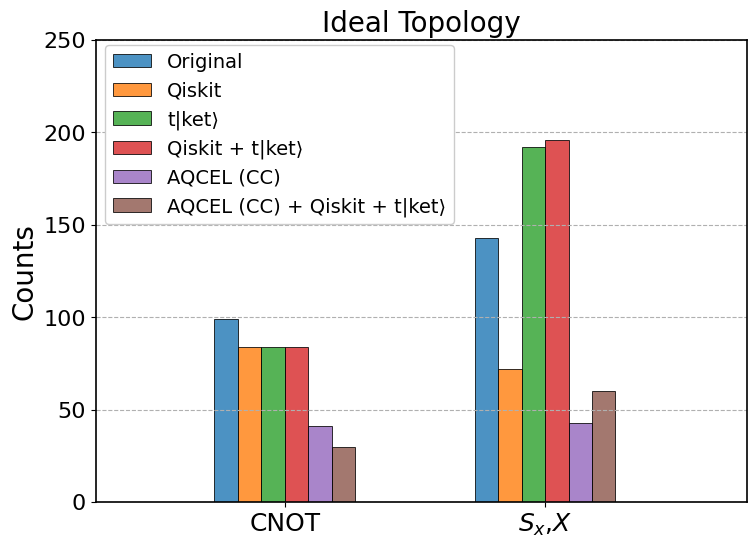

In [2]:
labels=['Original', 'Qiskit', 't|ket⟩', 'Qiskit + t|ket⟩', 'AQCEL (CC)', 'AQCEL (CC) + Qiskit + t|ket⟩']
file_name = 'ibm_kawasaki_1step_cc.csv'
title = 'Ideal Topology'
ylim=250
lists=[1,3,2,4,5,6]
output='1step_ideal_gates.pdf'

plt.style.use('default')
n = 2
index = np.arange(n)
bar_width = 0.09
alpha = 0.8
fig = plt.figure(figsize=(8.4, 6))
spines = 1.2

ax = fig.add_subplot(111)
ax.spines["top"].set_linewidth(spines)
ax.spines["left"].set_linewidth(spines)
ax.spines["bottom"].set_linewidth(spines)
ax.spines["right"].set_linewidth(spines)

names = []
for x in lists:
    names.append(extract(file_name, 'name')[x])

counts = []
for x in lists:
    counts.append(extract(file_name, 'gate counts')[x])

dic_counts = {}
for i, key in enumerate(names):
    dic_counts[key] = str_to_dict(counts[i])

for i, name in enumerate(names):

    counts = dic_counts[name]
    gates = [0, 0]

    for key in counts.keys():

        if key == 'cx':
            gates[0] += counts[key]

        #if key in ['rz','sx','x']:
        if key in ['x','sx']:
            gates[1] += counts[key]

    print(gates)

    plt.bar(index + i*bar_width, gates, bar_width, alpha=alpha ,label=labels[i], color = color_list[i], linewidth=0.7, edgecolor="black")
    
plt.ylim([0,ylim])
plt.xlim([-0.5,2])
plt.yticks(fontsize=16)
plt.title(title,fontsize=20)
plt.ylabel('Counts',fontsize=20)
#plt.xticks(index + 1.5*bar_width, ('CNOT','$R_z$,$S_x$,$X$','All Gates','Depth'),fontsize=14)
plt.xticks(index + 2.5*bar_width, ('CNOT','$S_x$,$X$'),fontsize=18)
plt.grid(axis = 'y',linestyle = "--")
plt.legend(bbox_to_anchor=(0.55, 0.99), loc='upper right', borderaxespad=0, fontsize=14, framealpha=1)
plt.show()
fig.savefig(output, bbox_inches='tight', pad_inches=0.1)

[324, 192, 153.69955555555555]
[255, 102, 138.32533333333333]
[212, 171, 106.25422222222223]
[41, 48, 29.297777777777778]
[41, 12, 17.84888888888889]
[41, 48, 29.297777777777778]


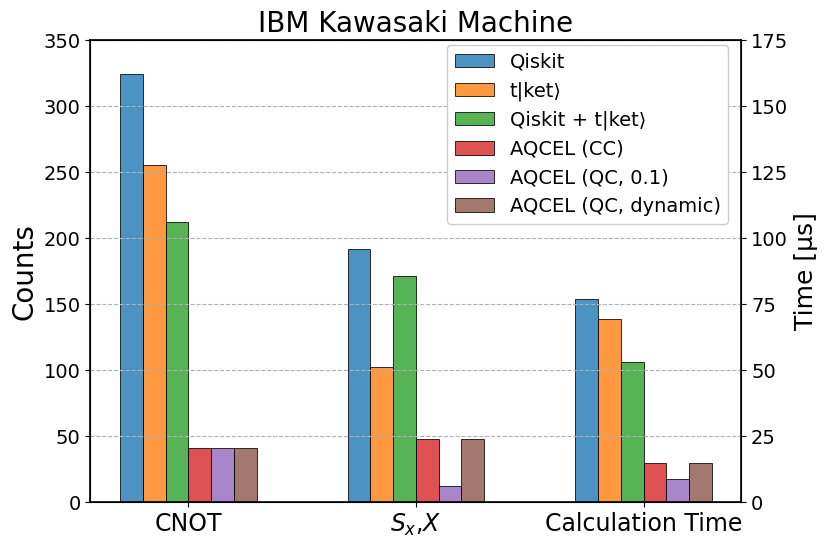

In [3]:
plt.style.use('default')
n = 3
index = np.arange(n)
bar_width = 0.1
alpha = 0.8
fig = plt.figure(figsize=(8.4, 6))
spines = 1.2

ax1 = fig.add_subplot(111)
ax1.spines["top"].set_linewidth(spines)
ax1.spines["left"].set_linewidth(spines)
ax1.spines["bottom"].set_linewidth(spines)
ax1.spines["right"].set_linewidth(spines)

ax2 = ax1.twinx()

labels=['Qiskit', 't|ket⟩', 'Qiskit + t|ket⟩', 'AQCEL (CC)', 'AQCEL (QC, 0.1)', 'AQCEL (QC, dynamic)']
depths = [float(extract('ibm_kawasaki_1step_cc.csv', 'depth')[x]) for x in [7,8,9,10]] + [float(extract('ibm_kawasaki_1step_qc.csv', 'depth')[x]) for x in [4,9]]
counts = [str_to_dict(extract('ibm_kawasaki_1step_cc.csv', 'gate counts')[x]) for x in [7,8,9,10]] + [str_to_dict(extract('ibm_kawasaki_1step_qc.csv', 'gate counts')[x]) for x in [4,9]]

for i in range(6):

    count = counts[i]
    gates = [0, 0, depths[i]*2e6]

    for key in count.keys():

        if key == 'cx':
            gates[0] += count[key]

        #if key in ['rz','sx','x']:
        if key in ['x','sx']:
            gates[1] += count[key]

    print(gates)

    ax1.bar(index + i*bar_width, gates, bar_width, alpha=alpha ,label=labels[i], linewidth=0.7, edgecolor="black")

ax1.set_yticks([0,50,100,150,200,250,300,350])
ax1.set_yticklabels([0,50,100,150,200,250,300,350],fontsize=14)
ax2.set_yticks([0,25,50,75,100,125,150,175])
ax2.set_yticklabels([0,25,50,75,100,125,150,175], fontsize=14)
ax2.set_ylabel('Time [μs]',fontsize=18)
plt.title('IBM Kawasaki Machine',fontsize=20)
ax1.set_ylabel('Counts',fontsize=20)
ax1.set_xticks([0.25,1.25,2.25],fontsize=17) 
ax1.set_xticklabels(['CNOT','$S_x$,$X$','Calculation Time'],fontsize=17)
ax1.grid(axis = 'y',linestyle = "--")
ax1.legend(bbox_to_anchor=(0.98, 0.99), loc='upper right', borderaxespad=0, fontsize=14, framealpha=1)
plt.show()
fig.savefig('1step_kawasaki_gates.pdf', bbox_inches='tight', pad_inches=0.1)

In [4]:
import re
import ast

data = extract('ibm_kawasaki_1step_qc.csv', 'F_meas')[1:]
Fmeas_qc = []
Fmeas_err_qc = []
for i, x in enumerate(data):
    fidelities = ast.literal_eval(x)
    Fmeas_qc.append(np.mean(fidelities))
    Fmeas_err_qc.append(np.std(fidelities))

In [5]:
Fmeas_qc, Fmeas_err_qc

([0.9068153333333334,
  0.9129376666666666,
  0.9160393333333333,
  0.9605096666666667,
  0.9621723333333333,
  0.963103,
  0.9538816666666664,
  0.8798526666666665,
  0.9161836666666666],
 [0.0017045130943729673,
  0.002181388981564016,
  0.001708767457035108,
  0.0013641956930326674,
  0.0014502061539273996,
  0.0013905038655106353,
  0.0015219857277765703,
  0.002441121236007933,
  0.0019164611194131215])

In [6]:
data = extract('ibm_kawasaki_1step_cc.csv', 'F_meas')[7:]
Fmeas_cc = []
Fmeas_err_cc = []
for i, x in enumerate(data):
    fidelities = ast.literal_eval(x)
    Fmeas_cc.append(np.mean(fidelities))
    Fmeas_err_cc.append(np.std(fidelities))

In [7]:
Fmeas_cc, Fmeas_err_cc

([0.3722026666666666,
  0.5886196666666665,
  0.5128303333333333,
  0.9109230000000001],
 [0.004488493387417303,
  0.004431455354119638,
  0.0048180940099679355,
  0.001837888553023107])

[0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3] [1.0, 1.0, 1.0, 0.98073, 0.98073, 0.98073, 0.98073, 0.79193] [0.9068153333333334, 0.9129376666666666, 0.9160393333333333, 0.9605096666666667, 0.9621723333333333, 0.963103, 0.9538816666666664, 0.8798526666666665] [0.0017045130943729673, 0.002181388981564016, 0.001708767457035108, 0.0013641956930326674, 0.0014502061539273996, 0.0013905038655106353, 0.0015219857277765703, 0.002441121236007933]


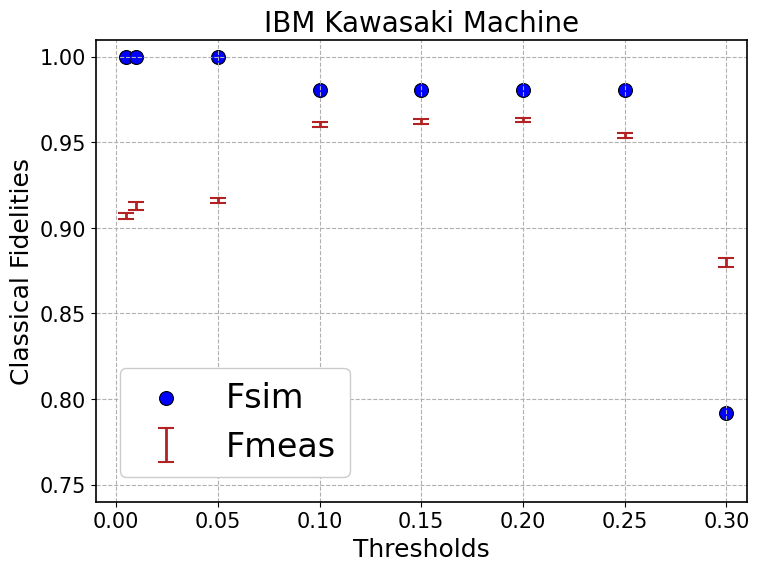

In [8]:
plt.style.use('default')

fig = plt.figure(figsize=(8.4, 6))
spines = 1.2

ax = fig.add_subplot(111)
ax.spines["top"].set_linewidth(spines)
ax.spines["left"].set_linewidth(spines)
ax.spines["bottom"].set_linewidth(spines)
ax.spines["right"].set_linewidth(spines)

data1 = extract('ibm_kawasaki_1step_qc.csv', 'name')[1:-1]
thresholds = []
for i, x in enumerate(data1):
    thresholds.append(float(x))

data2 = extract('ibm_kawasaki_1step_qc.csv', 'F_sim')[1:-1]
Fsim = []
for i, x in enumerate(data2):
    Fsim.append(float(x))
        
print(thresholds, Fsim, Fmeas_qc[:-1], Fmeas_err_qc[:-1])

legend=['Fsim','Fmeas']

plt.scatter(thresholds, Fsim, marker='o', s=100, label=legend[0], color = 'blue', linewidth=0.8, edgecolor="black")
plt.errorbar(thresholds, Fmeas_qc[:-1], yerr=Fmeas_err_qc[:-1], capsize=6, capthick=1.5, linewidth=2, fmt='o', markersize=0, ecolor='firebrick', label=legend[1])


plt.xlim([-0.01,0.31])
plt.ylim([0.74,1.01])

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('IBM Kawasaki Machine',fontsize=20)
plt.ylabel('Classical Fidelities',fontsize=18) #y軸のラベル
plt.xlabel('Thresholds',fontsize=18) #x軸のラベル
plt.grid(True,linestyle = "--"); #グリッドの表示
plt.legend(bbox_to_anchor=(0.39, 0.29), loc='upper right', borderaxespad=0, fontsize=24, framealpha=1)
plt.show()
fig.savefig('constant.pdf',bbox_inches='tight', pad_inches=0.1)

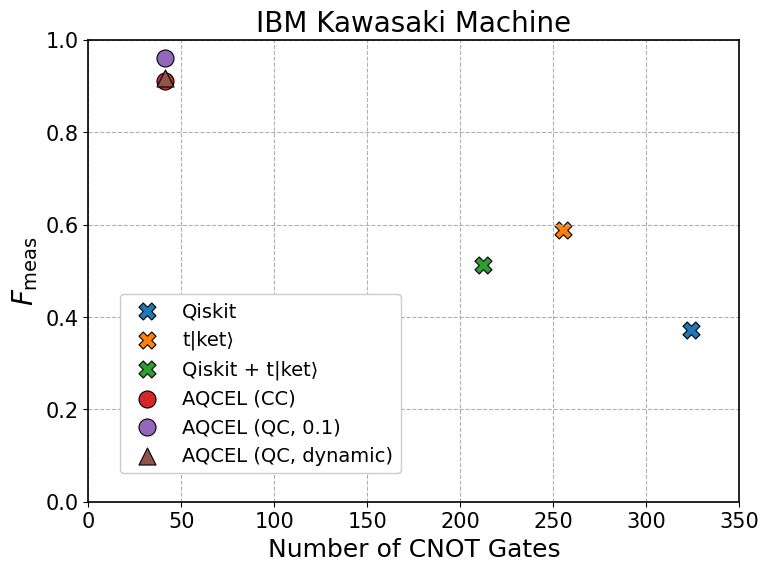

In [17]:
plt.style.use('default')

fig = plt.figure(figsize=(8.4, 6))
spines = 1.2

ax = fig.add_subplot(111)
ax.spines["top"].set_linewidth(spines)
ax.spines["left"].set_linewidth(spines)
ax.spines["bottom"].set_linewidth(spines)
ax.spines["right"].set_linewidth(spines)


data1 = Fmeas_cc + [Fmeas_qc[x] for x in [3,8]]
data2 = [int(str_to_dict(extract('ibm_kawasaki_1step_cc.csv', 'gate counts')[x])['cx']) for x in [7,8,9,10]] + [int(str_to_dict(extract('ibm_kawasaki_1step_qc.csv', 'gate counts')[x])['cx']) for x in [4,9]]

legend=['Qiskit', 't|ket⟩', 'Qiskit + t|ket⟩', 'AQCEL (CC)', 'AQCEL (QC, 0.1)', 'AQCEL (QC, dynamic)']

for n in range(6):
    if n <= 2:
        plt.scatter(data2[n],data1[n], marker='X', s=150,  label=legend[n], color = color_list[n], linewidth=0.8, edgecolor="black")
    elif n == 5:
        plt.scatter(data2[n],data1[n], marker='^', s=150,  label=legend[n], color = color_list[n], linewidth=0.8, edgecolor="black")
    else:
        plt.scatter(data2[n],data1[n], marker='o', s=150,  label=legend[n], color = color_list[n], linewidth=0.8, edgecolor="black")
        
plt.xlim([0,350])
plt.ylim([0,1])

plt.legend(bbox_to_anchor=(0.48, 0.45), loc='upper right', borderaxespad=0, fontsize=14, framealpha=1)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('IBM Kawasaki Machine',fontsize=20)
plt.ylabel('$F_{\mathrm{meas}}$',fontsize=20) #y軸のラベル
plt.xlabel('Number of CNOT Gates',fontsize=18) #x軸のラベル
plt.grid(True,linestyle = "--"); #グリッドの表示
fig.savefig('1step_CNOTvsFmeas.pdf',bbox_inches='tight', pad_inches=0.1)